# Seaborn: lineplot

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

Grab parking data from [UCI resource](https://archive.ics.uci.edu/ml/datasets/Parking+Birmingham) with Bash commands and read in as `pandas` DataFrame.

In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip

--2021-12-30 12:50:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00482/dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240539 (235K) [application/x-httpd-php]
Saving to: ‘dataset.zip.1’

dataset.zip.1       100%[===================>] 234.90K   216KB/s    in 1.1s    

2021-12-30 12:50:29 (216 KB/s) - ‘dataset.zip.1’ saved [240539/240539]



In [8]:
!unzip dataset.zip

Archive:  dataset.zip
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [10]:
df = pd.read_csv('dataset.csv', parse_dates=[3])

In [11]:
df.head()

,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


Do a bit of data cleaning: 
- Rename some columns 
- Create three new date/time columns for later aggregations
- Filter down to only two garage locations

In [12]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [13]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]

In [14]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


## Intro Visuals

In [ ]:
blue, orange, green, red = sns.color_palette()[:4]

In [ ]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('date.autoformatter', day='%b %Y')

In [ ]:
months = [pd.datetime(2016, 10, 1), pd.datetime(2016, 11, 1), pd.datetime(2016, 12, 1)];

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy, ci=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
plt.ylim(0, 570)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(park.Day, park.Occupancy, hue=park.Location, palette=['gray', 'purple'])
plt.xticks(months)
plt.yticks([])
plt.xlim(None, pd.datetime(2016, 12, 1))
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.legend([], frameon=False)
plt.tight_layout();

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.datetime(2016, 10, 30), pd.datetime(2016, 11, 6))
sns.despine(left=True)
plt.ylim(0, 600)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [ ]:
plt.rc('date.autoformatter', day='%b 1st')
plt.figure(figsize=(6,4))
sns.lineplot(park.Day, park.Occupancy, ci=None)
plt.xticks(months)
plt.yticks([])
plt.xlim(pd.datetime(2016, 10, 30), pd.datetime(2016, 11, 6))
plt.ylim(0, 600)
sns.despine(left=True)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

In [ ]:
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Basics

In [15]:
sns.set_style('dark')

In [18]:
months = [pd.datetime(2016, 10, 1), 
          pd.datetime(2016, 11, 1), 
          pd.datetime(2016, 12, 1)]
plt.rc('date.autoformatter', day='%b %Y');

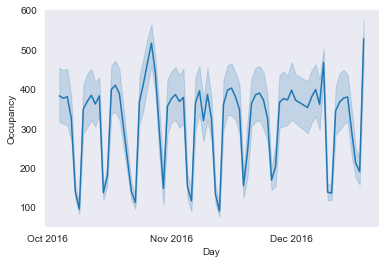

In [19]:
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months);

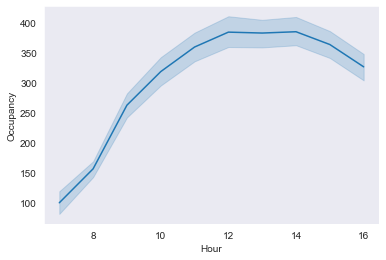

In [20]:
sns.lineplot(park.Hour, park.Occupancy);

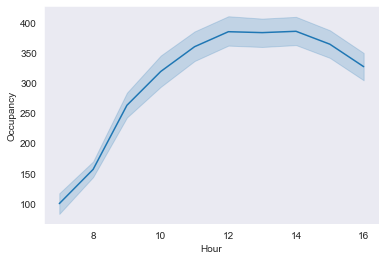

In [21]:
sns.lineplot(x='Hour', y='Occupancy', data=park);

## Bootstrapping

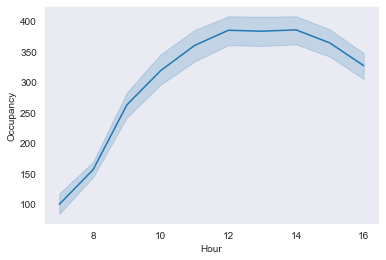

In [22]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             n_boot=1000  
            );

Decreasing the number of bootstrap samples will increase variance of confidence intervals.

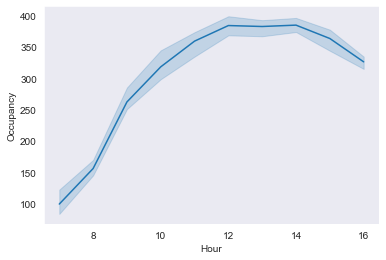

In [25]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             n_boot=10
            );

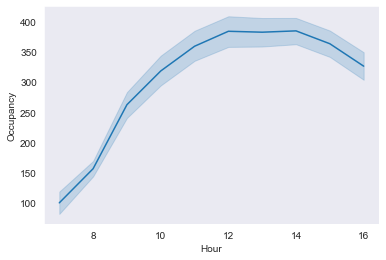

In [26]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             ci=95
            );

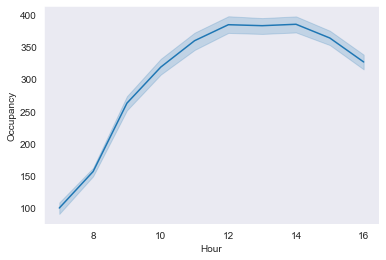

In [27]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             ci=68
            );

To turn off the bootstrapped confidence intervals, set `ci=None` to trigger early exit within Seaborn code.  (A conditional checks for this case and completely bypasses the bootstrapping procedure if `ci` is set to `None`.  This saves time if confidence intervals are not needed!)

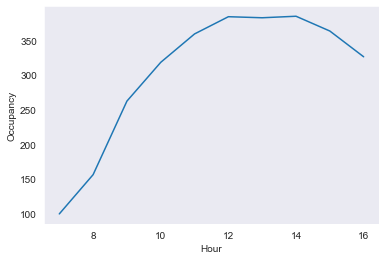

In [28]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             ci=None
            );

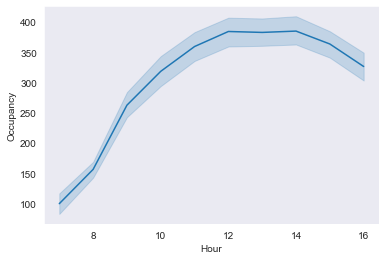

In [29]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='mean'
            );

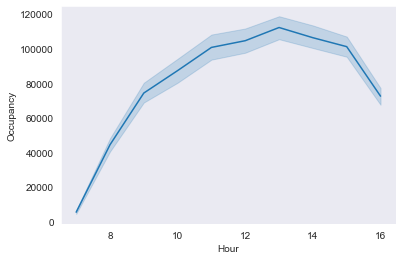

In [30]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='sum'
            );

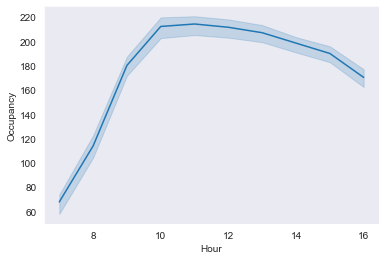

In [31]:
sns.lineplot(x='Hour', y='Occupancy', data=park,
             estimator='std'
            );

## Visual Semantics

### hue

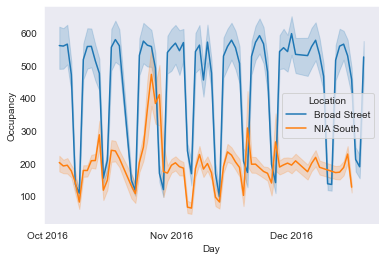

In [32]:
sns.lineplot(x='Day', y='Occupancy', data=park, hue='Location')

plt.xticks(months);

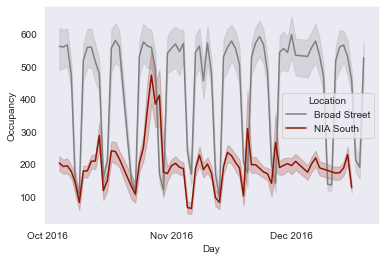

In [33]:
sns.lineplot(x='Day', y='Occupancy', data=park, 
             hue='Location',
             palette = ['gray', 'xkcd:brick red']
            )

plt.xticks(months);

### style

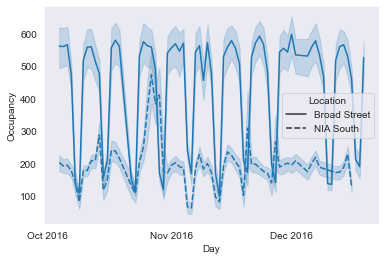

In [34]:
sns.lineplot(x='Day', y='Occupancy', data=park, style='Location')

plt.xticks(months);

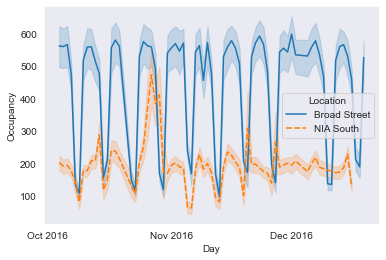

In [35]:
sns.lineplot(x='Day', y='Occupancy', data=park,
             hue="Location",
             style='Location'
            )

plt.xticks(months);

### size

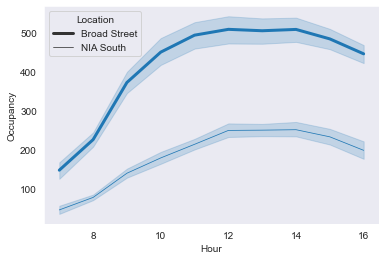

In [36]:
sns.lineplot(x='Hour', y='Occupancy', data=park, size='Location',
            );

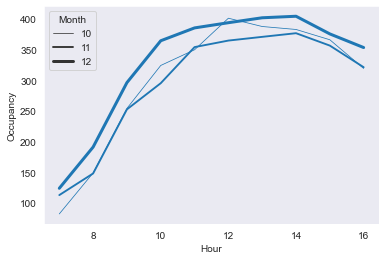

In [37]:
sns.lineplot(x='Hour', y='Occupancy', data=park, ci=None,
             size='Month'
            );

## Style

Most of matplotlib's line styling works within the Seaborn lineplot.  (The main exception is that `linestyle` does not work.)

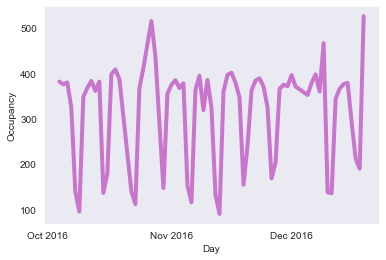

In [38]:
sns.lineplot(x='Day', y='Occupancy', data=park, ci=None, 
             lw=4,
             color='#aa00aa',
             alpha=0.5
            )

plt.xticks(months);